In [0]:
import pandas as pd

In [0]:
import pandas_datareader.data as web
from datetime import datetime

In [0]:
start = datetime(2015, 1, 1)
end = datetime(2016, 12, 31)
# ticker = 'GOOG'
# data_source = 'google'
# stock_data = DataReader(ticker, data_source, start, end)

stock_data = web.get_data_yahoo('SPY', start=start, end=end)

In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 6 columns):
High         504 non-null float64
Low          504 non-null float64
Open         504 non-null float64
Close        504 non-null float64
Volume       504 non-null float64
Adj Close    504 non-null float64
dtypes: float64(6)
memory usage: 27.6 KB


In [14]:
pd.concat([stock_data.head(3), stock_data.tail(3)])

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,187.074585
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,183.696091
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,181.965881
2016-12-28,226.589996,224.270004,226.570007,224.399994,64095000.0,213.045227
2016-12-29,224.889999,223.839996,224.479996,224.350006,48696100.0,212.997772
2016-12-30,224.830002,222.729996,224.729996,223.529999,108998300.0,212.219269


## Visualization



In [0]:
import matplotlib.pyplot as plt

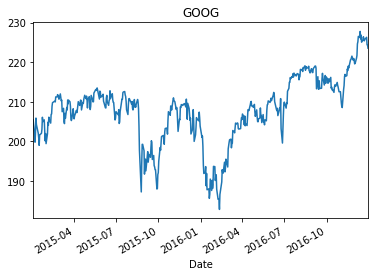

In [16]:
stock_data['Close'].plot(title=ticker)

## Interest rates from FRED


In [0]:
from pandas_datareader.data import DataReader
from datetime import date

In [0]:
series_code = "DGS10"
data_source = 'fred'
start = date(1962, 1, 1)
data = DataReader(series_code, data_source, start)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15094 entries, 1962-01-02 to 2019-11-08
Data columns (total 1 columns):
DGS10    14450 non-null float64
dtypes: float64(1)
memory usage: 235.8 KB


In [0]:
# rename the column name 
series_name = '10-year Treasury'
data = data.rename(columns={series_code:series_name})

## Stock prices : Visualization

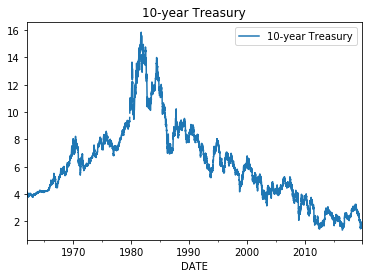

In [21]:
data.plot(title=series_name)
plt.show()

## Combine stock and Economic data

In [0]:
start = date(2000, 1, 1)
series = 'DCOILWTICO' # west texas instrument oil price
oil = DataReader(series, 'fred', start)

# lets combine the oil price with the stock price of Exxon mobile
ticker = 'XOM' # Exxon mobile corporation
stock = web.get_data_yahoo(ticker, start)


In [0]:
# concat both dataframes

data = pd.concat([stock['Close'], oil], axis=1)  # concatenate horizontally

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5182 entries, 2000-01-03 to 2019-11-12
Data columns (total 2 columns):
Close         4998 non-null float64
DCOILWTICO    4981 non-null float64
dtypes: float64(2)
memory usage: 121.5 KB


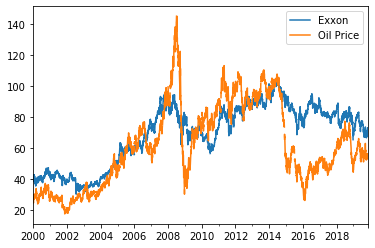

In [31]:
data.columns = ['Exxon', 'Oil Price']
data.plot()
plt.show()

### Note how Exxon mobile prices has been stable, despite the drop in oil prices, which indicates oil prices variations are not correlated with Exxon mobile prices